# Challenge 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
print(titanic.select_dtypes(include=["int64", "float64"]).columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [5]:
print(titanic.select_dtypes(exclude=["int64", "float64"]).columns)

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = (12, 6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

<AxesSubplot:ylabel='Frequency'>

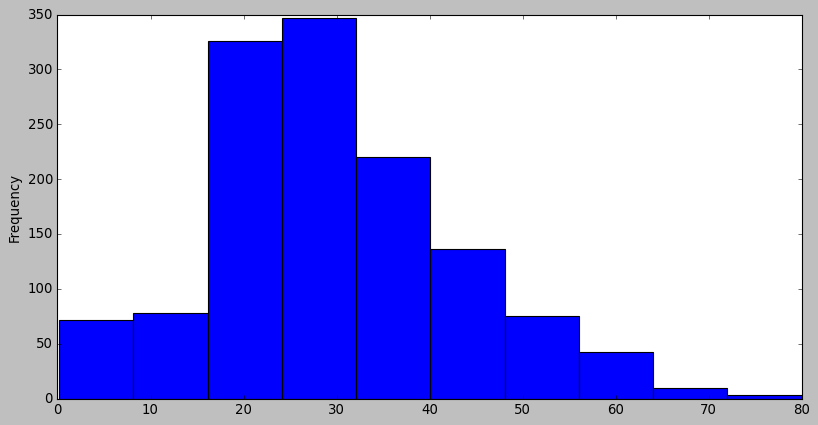

In [7]:
titanic["Age"].plot.hist()

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

<AxesSubplot:ylabel='Frequency'>

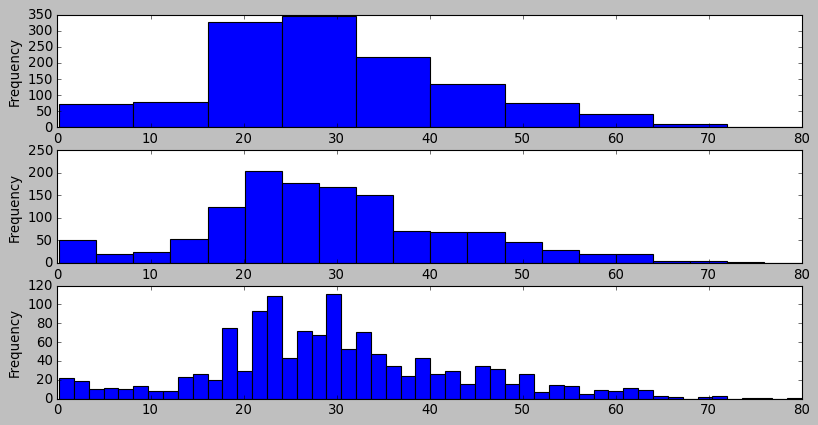

In [8]:
fig, axs = plt.subplots(3, 1)
axs[0] = titanic["Age"].plot.hist(bins=10)
axs[1] = titanic["Age"].plot.hist(bins=20)
axs[2] = titanic["Age"].plot.hist(bins=50)
# code is not behaving as expected

plt.subplot(3, 1, 1)
titanic["Age"].plot.hist(bins=10)
plt.subplot(3, 1, 2)
titanic["Age"].plot.hist(bins=20)
plt.subplot(3, 1, 3)
titanic["Age"].plot.hist(bins=50)


#### Whether the bin size affects your plot? Why?

In [9]:
# The more bins, the better the accuracy and resolution of the plot.

#### Use seaborn to show the distribution of the column `Age`

<AxesSubplot:xlabel='Age'>

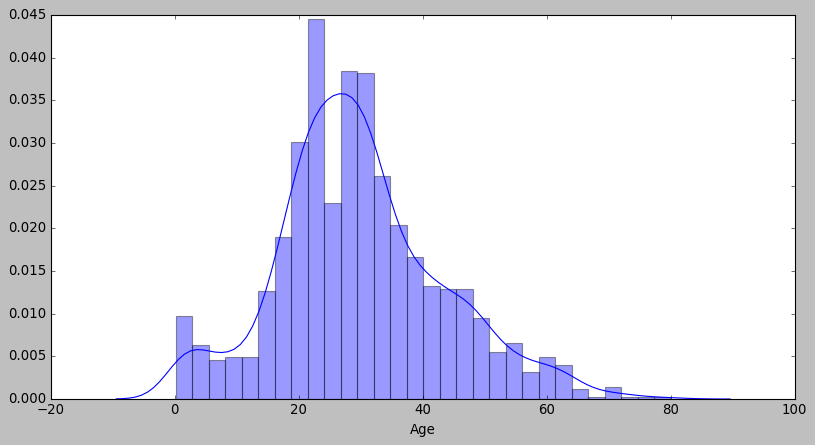

In [10]:
sns.distplot(titanic["Age"])

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

<AxesSubplot:>

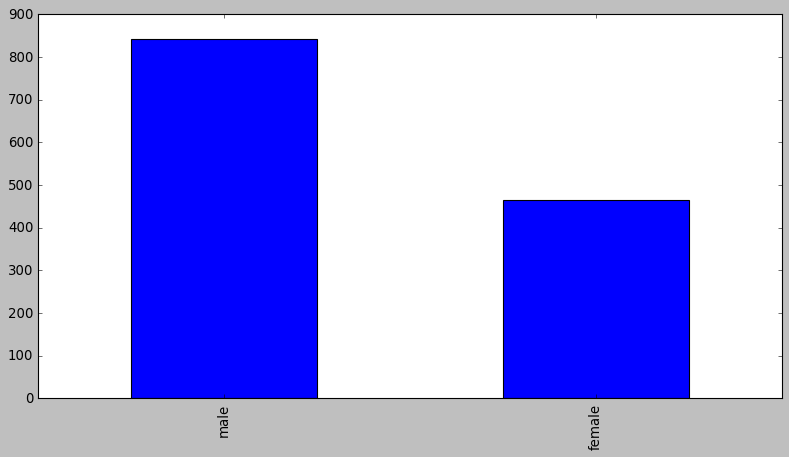

In [11]:
titanic["Gender"].value_counts().plot.bar()

<AxesSubplot:xlabel='Gender', ylabel='count'>

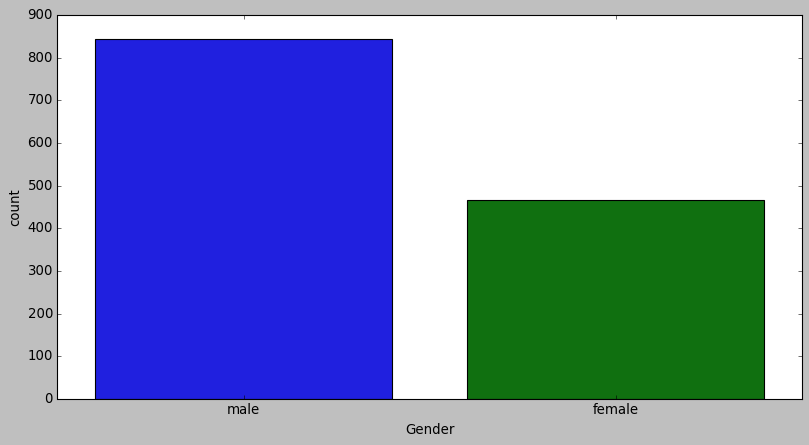

In [12]:
sns.countplot(x="Gender", data=titanic)

#### Use the appropriate plot to visualize the column `Pclass` 


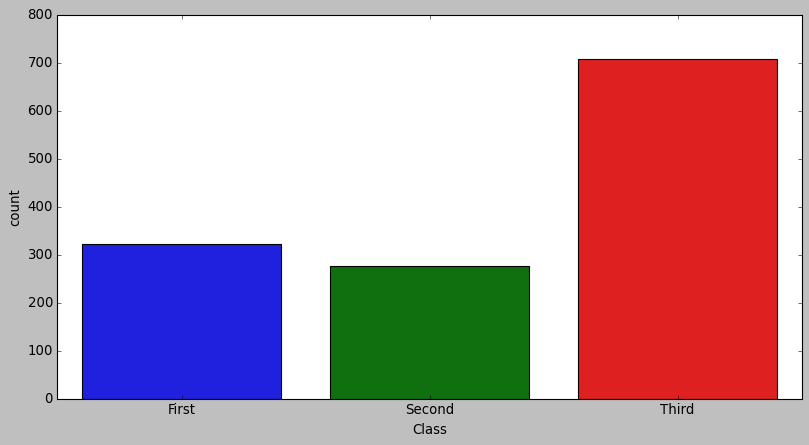

In [13]:
ax = sns.countplot(x="Pclass", data=titanic)
ax.set(xlabel="Class", xticklabels=["First", "Second", "Third"])
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

<AxesSubplot:xlabel='Age'>

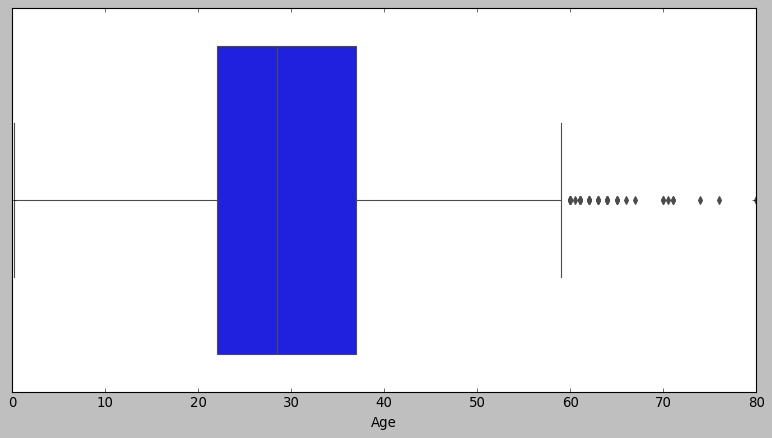

In [14]:
sns.boxplot(x="Age", data=titanic)

#### What does the previous plot tell you about the feature `Age`? Comment.

In [15]:
# Q2 (median) is aproximately 29 years
# Q1 (percentile 25) is approx 22 years
# Q3 (percentile 75) is approx 38 years
# Outliers are people older than 59 years
# IQR (Inter Quartile Range) is between 22 and 38 years, thus 50% of the tripulations falls here

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

<AxesSubplot:xlabel='Age'>

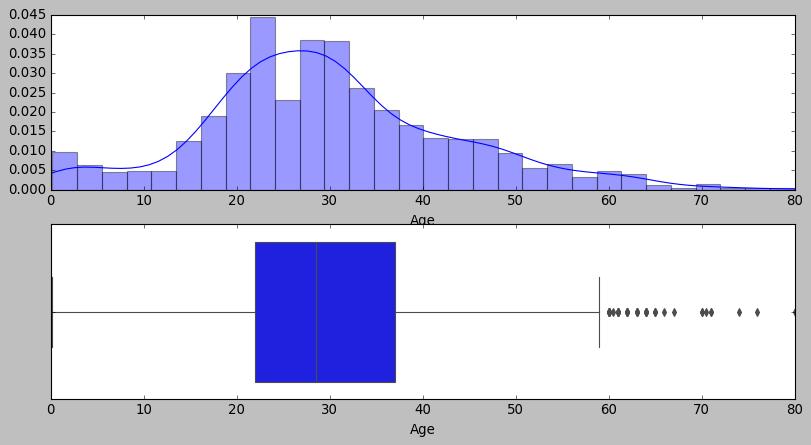

In [16]:
plt.subplot(2, 1, 1)
sns.distplot(titanic["Age"])
plt.xlim([0, 80])
plt.subplot(2, 1, 2)
sns.boxplot(x="Age", data=titanic)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [17]:
# The distribution plot and the box plot match

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

<AxesSubplot:xlabel='Fare', ylabel='Age'>

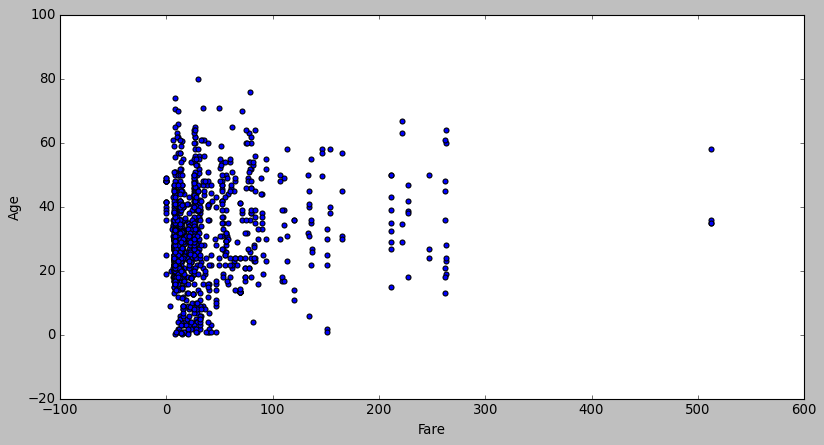

In [18]:
titanic.plot.scatter(x="Fare", y="Age")

<AxesSubplot:xlabel='Fare', ylabel='Age'>

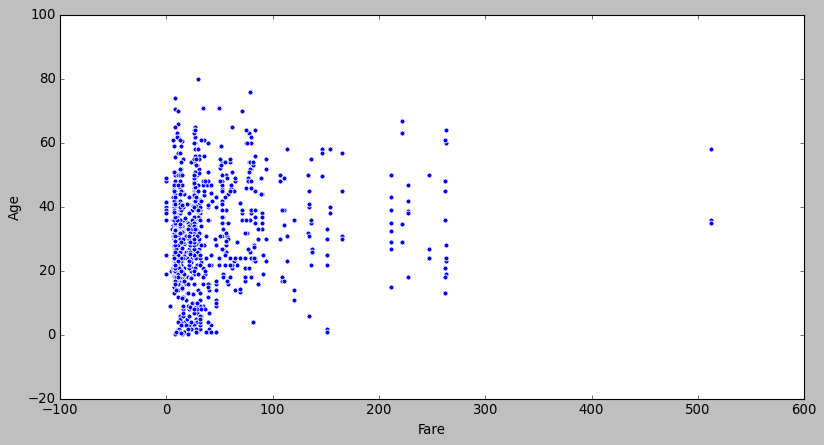

In [19]:
sns.scatterplot(x="Fare", y="Age", data=titanic)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

<AxesSubplot:>

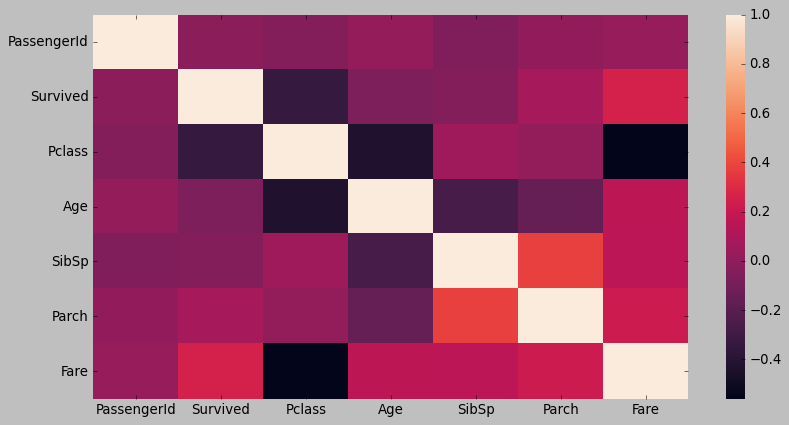

In [20]:
sns.heatmap(data=titanic.corr())

#### According to the previous plot, what are the most correlated feature? Comment.

In [21]:
# SibSp and Parch

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

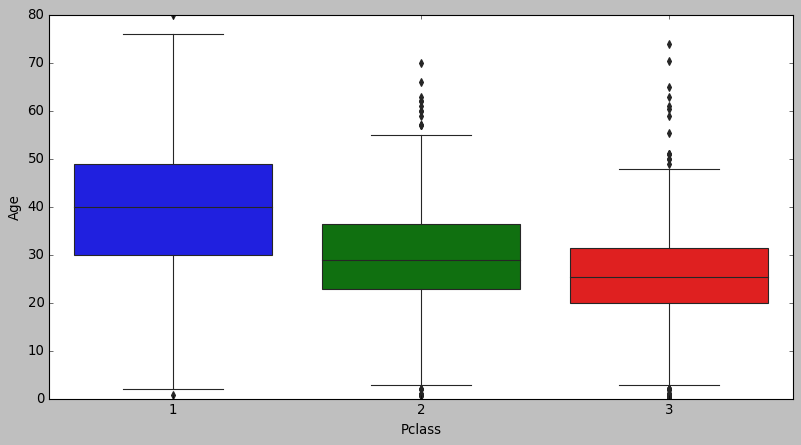

In [22]:
sns.boxplot(x="Pclass", y="Age", data=titanic)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

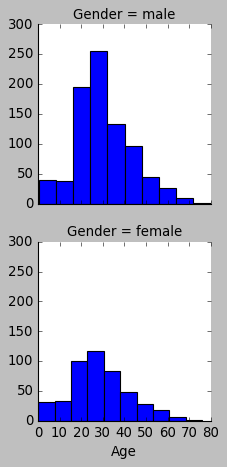

In [23]:
g = sns.FacetGrid(data=titanic, row="Gender")
g.map(plt.hist, "Age")